# Supervised Learning 

Our approach here is to use classification by running the Logistic Regression algorithm with our BestSeller column out of the df.
1. load the data from 'Amazon Items Cleaned.csv' to a data frame.
2. Split the data to X and y where X containing all relevant features and y is our BestSeller column.
3. Split the data into train and test subsets: X_train, X_test, y_train, y_test. We will use random pick and default size of 25%.
4. Run the algorithm to train the model with fit().

In [267]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing, linear_model, model_selection, metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, f1_score

df1 = pd.read_csv("Amazon Items Cleaned.csv")
df1

# import matplotlib.pyplot as plt
# %matplotlib inline  
# plt.rcParams['figure.figsize'] = (10, 6)

# lrm = linear_model.LogisticRegression()
# lrm.fit(df[["Stars"]],df["BestSeller"])
# df.plot.scatter(x='Stars',y='BestSeller',s=30)
# x = np.linspace(df['Stars'].min(),df['Stars'].max(),1000)
# y_pred_p=lrm.predict_proba(np.reshape(x, (-1, 1)))
# y_pred_p1=[y[1] for y in y_pred_p]
# plt.plot(x,y_pred_p1,color='Black')
# plt.plot(x,[0.5]*len(x),color="red")
# plt.show()

,Name,Brand,Rating,BestSeller,AmazonChoice,Comments,Price,Stars
0,"NOCO NUSB211NA 10W USB Power Adapter, 2.1A 5V ...",NOCO,3869.0,0,0,28.0,13.95,4.7
1,Amazfit Band 5 Activity Fitness Tracker with A...,Amazfit,21158.0,0,0,1000.0,29.88,4.1
2,Amazon Basics Universal Travel Case Organizer ...,AmazonBasics,16242.0,0,1,277.0,14.44,4.6
3,"Amazon Glow with Tangram Bits | Learn, Play, R...",Amazon,215.0,0,1,31.0,329.98,4.4
4,"Echo Show 5 (2nd Gen, 2021 release) - Deep Sea...",Amazon,928.0,0,1,21.0,114.98,4.7
...,...,...,...,...,...,...,...,...
1600,American Eagle Gift Card,American Eagle,5999.0,0,0,4.0,25.00,4.9
1601,Amazon.com Gift Cards - As a Bookmark,Amazon,3950.0,0,0,15.0,100.00,4.9
1602,Amazon.com Gift Card in a Gift Tag,Amazon,7520.0,0,0,12.0,10.00,4.9
1603,"Amazon.com $10 Gift Cards, Pack of 3 (Holiday ...",Amazon,3014.0,0,0,3.0,30.00,4.9


<AxesSubplot:xlabel='Stars', ylabel='BestSeller'>

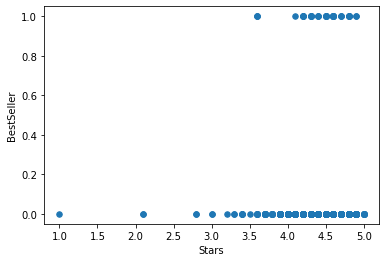

In [303]:
df1.plot.scatter(x='Stars',y='BestSeller',s=30)

c:\Users\Yaniv\anaconda3\envs\datascience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


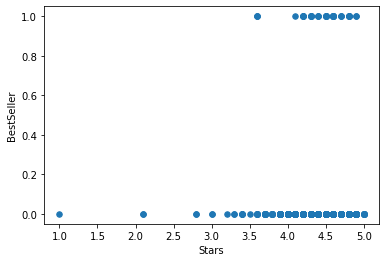

In [331]:


lrm = linear_model.LogisticRegression()
lrm.fit(df1[["Stars"]], df1["BestSeller"])

df1.plot.scatter(x='Stars',y='BestSeller',s=30)

#create a set of points along the x axis to print prediction graph
x = np.linspace(df1['Stars'].min(), df1['BestSeller'].max(), 1000)

#get probabilistic predictions for those points(using predict_proba) we need to reshape x to get it to a 2 dimensional array
y_pred_p = lrm.predict_proba(np.reshape(x, (-1, 1)))

#get only the probability for the "pass" category
y_pred_p1 = [y[1] for y in y_pred_p]

#plot the prediction graph
plt.plot(x,y_pred_p1,color='Black')

# draw the line of y=0.5 as the decision point
plt.plot(x, [0.5]*len(x), color="red")
plt.show()



Split dataset into feature vector (X) and target value (y) series

In [268]:
df = df1.copy()
X = df
y = df["BestSeller"]
X.pop("BestSeller")
X.pop("Name")
X.pop("Brand")

X


,Rating,AmazonChoice,Comments,Price,Stars
0,3869.0,0,28.0,13.95,4.7
1,21158.0,0,1000.0,29.88,4.1
2,16242.0,1,277.0,14.44,4.6
3,215.0,1,31.0,329.98,4.4
4,928.0,1,21.0,114.98,4.7
...,...,...,...,...,...
1600,5999.0,0,4.0,25.00,4.9
1601,3950.0,0,15.0,100.00,4.9
1602,7520.0,0,12.0,10.00,4.9
1603,3014.0,0,3.0,30.00,4.9


In [278]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1600    0
1601    0
1602    0
1603    0
1604    0
Name: BestSeller, Length: 1605, dtype: int64

Setting a function for splitting into train and test

In [ ]:
# Function - Spliting the dataset into test and train
# test_size = default 0.25
# random_state = default np.random

def split_to_train_and_test(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    return X_train, X_test, y_train, y_test

Splitting the data into train and test subsets

In [ ]:
X_train, X_test, y_train, y_test = split_to_train_and_test(X,y)

In [ ]:
# function - MinMax Scaler

def scale_features(X_train):
    scaler = MinMaxScaler(feature_range=(0, 1)) # StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    return X_train_scaled

Linear Regression - Evaluation using r2_score

In [ ]:
def train_1st_model(X_train, y_train):
    reg = LinearRegression(fit_intercept = True)
    reg.fit(X_train, y_train)
    return reg

def predict_1st(trained_1st_model, X_test):
    y_pred = trained_1st_model.predict(X_test)
    return y_pred

trained_model_1st = train_1st_model(X_train, y_train)
y_pred = predict_1st(trained_model_1st, X_test)

evaluatePer = metrics.r2_score(y_test, y_pred)
print(evaluatePer)

0.03274134780747706


R2 value is very low, hence we will not use Linear Regression

Scaling X_train

In [ ]:
X_train_scaled = scale_features(X_train)
print(X_train_scaled)
print("\n")
print("Min Value: ", X_train_scaled.min(axis=0))
print("Max Value: ", X_train_scaled.max(axis=0))

[[1.01860101e-02 1.00000000e+00 9.62888666e-02 5.08131338e-02
  8.50000000e-01]
 [7.40485434e-03 0.00000000e+00 1.45436309e-01 5.85425427e-02
  8.75000000e-01]
 [1.50654970e-03 1.00000000e+00 2.27683049e-01 7.71395004e-03
  9.50000000e-01]
 ...
 [1.88589674e-04 0.00000000e+00 0.00000000e+00 2.35746970e-02
  9.25000000e-01]
 [1.34332208e-02 1.00000000e+00 1.12337011e-01 1.97563690e-02
  9.00000000e-01]
 [2.60123689e-04 0.00000000e+00 3.00902708e-03 1.68037349e-02
  8.50000000e-01]]


Min Value:  [0. 0. 0. 0. 0.]
Max Value:  [1. 1. 1. 1. 1.]


Scaling X_test

In [ ]:
X_test_scaled = scale_features(X_test)
print(X_test_scaled)
print("\n")
print("Min Value: ", X_test_scaled.min(axis=0))
print("Max Value: ", X_test_scaled.max(axis=0))

[[2.37728744e-02 0.00000000e+00 6.01805416e-03 2.55790534e-02
  8.63636364e-01]
 [1.56393917e-02 0.00000000e+00 6.61985958e-02 4.93454179e-02
  9.09090909e-01]
 [0.00000000e+00 1.00000000e+00 1.01303912e-01 3.95770393e-01
  9.09090909e-01]
 ...
 [1.05969446e-02 1.00000000e+00 5.69709127e-01 6.95891239e-01
  7.72727273e-01]
 [9.36677480e-05 1.00000000e+00 4.01203611e-03 1.00684794e-01
  8.63636364e-01]
 [1.12682301e-02 0.00000000e+00 2.30692076e-02 1.30916415e-02
  8.18181818e-01]]


Min Value:  [0. 0. 0. 0. 0.]
Max Value:  [1. 1. 1. 1. 1.]


Logistic Regression - Evaluation using r2_score

In [ ]:
clf_model = LogisticRegression().fit(X_train, y_train)
clf_model
y_pred=clf_model.predict(X_test)

resDF = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
resDF.to_csv("Amazon Predict.csv", index = None)
indexes = resDF[resDF['Predicted'] == True].index.tolist()
print('Index of predicted products: ' + str(resDF[resDF['Predicted'] == True].index.tolist()))
for i in indexes:
    print(df1.loc[i])


Index of predicted products: [1344]
Name            SABRENT 4-Port USB 3.0 Hub, Slim Data USB Hub ...
Brand                                                     SABRENT
Rating                                                   155240.0
BestSeller                                                      0
AmazonChoice                                                    0
Comments                                                   1000.0
Price                                                       16.99
Stars                                                         4.6
Name: 1344, dtype: object


Let's look at the actual product that was predicted to become a bestseller.

We can see some indication we saw before:
1. Ratings - > 100k 
2. Amazon's choice - 0 it's negligible.
3. Comment - 1000 which is also the max.
4. Price - 0-100$ like we saw in the EDA section.
5. Stars - > 4 Stars like we also predicted before.

In [ ]:
# Count number of predicted items

count = 0
for i in resDF["Predicted"] :
    if i == 1 :
        count = count + 1
print(count)

1


We tried to predict if an item will be a Best Seller on amazon via logistic regression.

We found a correlation between the result to the actual bestsellers characteristics, but yet a lot of other items stand in the same criteria and not predicted also.

Note: Our prediction not always gives output.

We will try to use another Classifier - KNN

In [ ]:
df

,Rating,AmazonChoice,Comments,Price,Stars
0,3869.0,0,28.0,13.95,4.7
1,21158.0,0,1000.0,29.88,4.1
2,16242.0,1,277.0,14.44,4.6
3,215.0,1,31.0,329.98,4.4
4,928.0,1,21.0,114.98,4.7
...,...,...,...,...,...
1600,5999.0,0,4.0,25.00,4.9
1601,3950.0,0,15.0,100.00,4.9
1602,7520.0,0,12.0,10.00,4.9
1603,3014.0,0,3.0,30.00,4.9


Let's run KNN to try to classify our best sellers within the items.

We'll take a look only on the Stars and Rating from features.

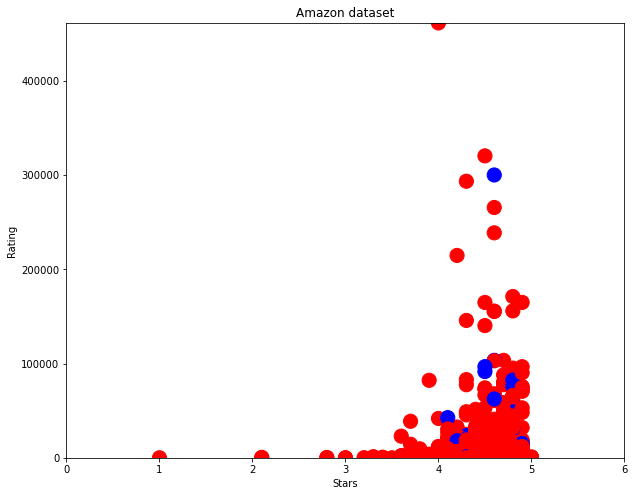

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


X = X[['Stars', 'Rating']]
# y = y

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# plot data
plt.figure(figsize=(10, 8))
plt.scatter(X.Stars, X.Rating, c=y,  marker="o", cmap=cmap_bold, s=200)


x_min, x_max = X.Stars.min() - 1, X.Stars.max() + 1
y_min, y_max = X.Rating.min() - 1, X.Rating.max() + 1
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title('Amazon dataset')
plt.xlabel('Stars')
plt.ylabel('Rating')
plt.show()


The blue dots above uses as indicators for bestsellers.

Now let's train the KNN classifier on the train set and try to asses it's performance by printing the confusion matrix, followed by the accuracy score.

In [ ]:


# Split into training and test sets
XTrain, XTest, yTrain, yTest = train_test_split(
    X, y, random_state=1, test_size=0.2)

# set up the model, k-NN classification with k = ?
k = 3
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(XTrain, yTrain)

y_pred = clf.predict(XTest)

print(metrics.confusion_matrix(y_true=yTest, y_pred=y_pred))

print('Accuracy = ', metrics.accuracy_score(y_true=yTest, y_pred=y_pred))


[[304   2]
 [ 15   0]]
Accuracy =  0.9470404984423676


Now we are running a test for various values of k to check which value of k (the amount of k = number of categories) gives the best result 

In [ ]:
k_s = []
train_accuracies = []
test_accuracies = []
for k in range(1, 21):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(XTrain, yTrain)
    y_pred_train = clf.predict(XTrain)
    y_pred = clf.predict(XTest)
    k_s.append(k)
    train_accuracies.append(metrics.accuracy_score(
        y_true=yTrain, y_pred=y_pred_train))
    test_accuracies.append(metrics.accuracy_score(y_true=yTest, y_pred=y_pred))

df = pd.DataFrame({"k": k_s, "train_accuracy": train_accuracies,
                  "test_accuracy": test_accuracies})
df


,k,train_accuracy,test_accuracy
0,1,0.996885,0.931464
1,2,0.975857,0.953271
2,3,0.975078,0.947040
3,4,0.975857,0.953271
4,5,0.975857,0.953271
5,6,0.975857,0.953271
6,7,0.975857,0.953271
7,8,0.975857,0.953271
8,9,0.975857,0.953271
9,10,0.975857,0.953271


We found that the best k is k = 1 with accuracy score of 0.948171 which is the min.

We will create the classification visualization for the knn classifier (based on the selected k). 

Any point in the red area will be classified as the red type, and any point in the green area will be classified as green.

c:\Users\Yaniv\anaconda3\envs\datascience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


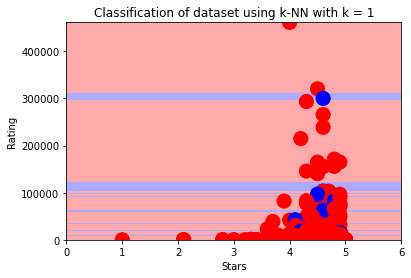

In [ ]:
k = 1
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X, y)

# plot classification
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),
                     np.linspace(y_min, y_max, 400))
zz = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, zz, cmap=cmap_light)

# plot data
plt.scatter(X.Stars, X.Rating, c=y, cmap=cmap_bold, s=200)

plt.title('Classification of dataset using k-NN with k = ' + str(k))
plt.xlabel('Stars')
plt.ylabel('Rating')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()


Cross validation to estimate the accuracy of a knn model on the dataset : 
1. Splitting the data
2. fitting a model and computing the score 10 consecutive times with different splits each time
3. printing overall score for the model.

In [ ]:
clf = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(clf, X, y, cv=10)

scores


array([0.9689441, 0.9689441, 0.9689441, 0.9689441, 0.9689441, 0.975    ,
       0.975    , 0.975    , 0.975    , 0.96875  ])

In [ ]:

print("Overall accuracy: %0.2f" % scores.mean())


Overall accuracy: 0.97


In [ ]:
clf = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(clf, X, y, cv=10)
scores_list=[cross_val_score(clf, X, y, cv=flds).mean() for flds in range(3,26)]
print("highest result with X-fold, x=",np.argmax(scores_list)+3)

highest result with X-fold, x= 19


GridSearchCV
We use the scoring parameter in order to define which evaluation score to optimize.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

parameters = {'n_neighbors': range(1, 25, 2)}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters, scoring=make_scorer(
    metrics.accuracy_score, greater_is_better=True))
clf.fit(XTrain, yTrain)

print("best parameter set is:", clf.best_params_,
      " and its score was", clf.best_score_)

#if you want to see all iterations internal numbers uncomment the next line
#print(clf.cv_results_.items())


best parameter set is: {'n_neighbors': 7}  and its score was 0.9758572470817122
